# Problem 1

/Users/stian/env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


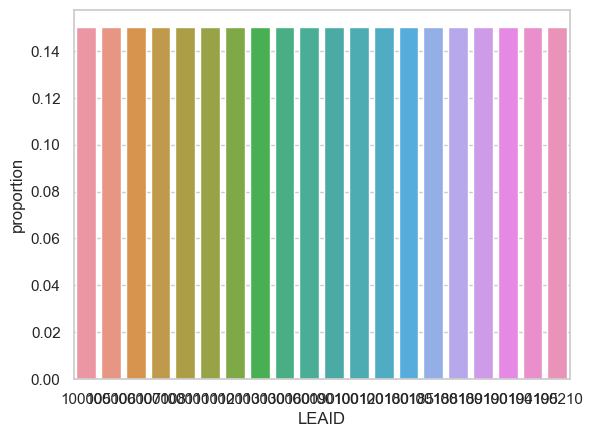

In [4]:
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

district_fiscal_data = pd.read_csv("/Users/stian/Desktop/DS5500/hw3/Sdf16_1a.txt", sep='\t')
district_fiscal_data[['V33','TFEDREV']]
district_fiscal_data = district_fiscal_data[district_fiscal_data.TFEDREV > 0]
district_fiscal_data_grouped = district_fiscal_data.groupby("STNAME").sum()
district_fiscal_data_sorted = district_fiscal_data_grouped.sort_values(by='TFEDREV', ascending=False)
district_fiscal_data_sorted

cut = district_fiscal_data.copy()
cut['cut'] = cut['TFEDREV']*0.15
cut['proportion'] = 0.15
cut[['LEAID','cut',"proportion"]]

import seaborn as sns
sns.set(style="whitegrid")
d_ = cut.head(20)
ax = sns.barplot(x="LEAID", y="proportion", data=d_)

In [5]:
d = cut.sort_values(by="cut",ascending=False).head(5)
d[['NAME','cut']]

,NAME,cut
11684,NYC CHANCELLOR'S OFFICE,260865150.0
1904,Los Angeles Unified,163710000.0
3850,City of Chicago SD 299,118863000.0
3022,DADE,64727850.0
3038,HILLSBOROUGH,46264050.0


# Problem 2

In [7]:
data = pd.read_csv("/Users/stian/Desktop/DS5500/hw4/ccd_lea_052_1516_w_1a_011717.csv")
data.columns.values

array(['SURVYEAR', 'FIPST', 'STABR', 'STATENAME', 'SEANAME', 'LEAID',
       'ST_LEAID', 'LEA_NAME', 'PK', 'KG', 'G01', 'G02', 'G03', 'G04',
       'G05', 'G06', 'G07', 'G08', 'G09', 'G10', 'G11', 'G12', 'G13',
       'UG', 'AE', 'TOTAL', 'MEMBER', 'AMPKM', 'AMPKF', 'ASPKM', 'ASPKF',
       'HIPKM', 'HIPKF', 'BLPKM', 'BLPKF', 'WHPKM', 'WHPKF', 'HPPKM',
       'HPPKF', 'TRPKM', 'TRPKF', 'AMKGM', 'AMKGF', 'ASKGM', 'ASKGF',
       'HIKGM', 'HIKGF', 'BLKGM', 'BLKGF', 'WHKGM', 'WHKGF', 'HPKGM',
       'HPKGF', 'TRKGM', 'TRKGF', 'AM01M', 'AM01F', 'AS01M', 'AS01F',
       'HI01M', 'HI01F', 'BL01M', 'BL01F', 'WH01M', 'WH01F', 'HP01M',
       'HP01F', 'TR01M', 'TR01F', 'AM02M', 'AM02F', 'AS02M', 'AS02F',
       'HI02M', 'HI02F', 'BL02M', 'BL02F', 'WH02M', 'WH02F', 'HP02M',
       'HP02F', 'TR02M', 'TR02F', 'AM03M', 'AM03F', 'AS03M', 'AS03F',
       'HI03M', 'HI03F', 'BL03M', 'BL03F', 'WH03M', 'WH03F', 'HP03M',
       'HP03F', 'TR03M', 'TR03F', 'AM04M', 'AM04F', 'AS04M', 'AS04F',
       'HI04M',

In [10]:
race_data = data[['LEAID', 'TOTAL', 'AM', 'AS', 
           'HI', 'BL', 'WH', 'HP', 'TR']]
race_data = race_data[race_data['TOTAL'] > 0]
race_data = race_data[race_data['HP'] >= 0]

In [11]:
race_data

,LEAID,TOTAL,AM,AS,HI,BL,WH,HP,TR
1,100005,5214,14,17,2289,152,2619,4,119
2,100006,5635,26,17,1160,50,4331,2,49
3,100007,13910,10,931,1008,3541,8131,14,275
4,100008,10011,62,862,439,2042,6186,27,393
6,100011,1905,2,13,241,433,1148,5,63
...,...,...,...,...,...,...,...,...,...
17588,6300026,8157,37,1442,1263,943,2444,154,1754
17589,6600002,30821,15,7098,47,45,184,22805,627
17590,7200030,379818,317,54,378849,73,499,26,0
17591,7800002,6559,4,23,1828,4591,78,6,29


In [12]:
race_data['AM_proportion'] = race_data['AM'] / race_data['TOTAL']
race_data['AS_proportion'] = race_data['AS'] / race_data['TOTAL']
race_data['HI_proportion'] = race_data['HI'] / race_data['TOTAL']
race_data['BL_proportion'] = race_data['BL'] / race_data['TOTAL']
race_data['WH_proportion'] = race_data['WH'] / race_data['TOTAL']
race_data['HP_proportion'] = race_data['HP'] / race_data['TOTAL']
race_data['TR_proportion'] = race_data['TR'] / race_data['TOTAL']
race_data

,LEAID,TOTAL,AM,AS,HI,BL,WH,HP,TR,AM_proportion,AS_proportion,HI_proportion,BL_proportion,WH_proportion,HP_proportion,TR_proportion
1,100005,5214,14,17,2289,152,2619,4,119,0.002685,0.003260,0.439010,0.029152,0.502301,0.000767,0.022823
2,100006,5635,26,17,1160,50,4331,2,49,0.004614,0.003017,0.205856,0.008873,0.768589,0.000355,0.008696
3,100007,13910,10,931,1008,3541,8131,14,275,0.000719,0.066930,0.072466,0.254565,0.584543,0.001006,0.019770
4,100008,10011,62,862,439,2042,6186,27,393,0.006193,0.086105,0.043852,0.203976,0.617920,0.002697,0.039257
6,100011,1905,2,13,241,433,1148,5,63,0.001050,0.006824,0.126509,0.227297,0.602625,0.002625,0.033071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17588,6300026,8157,37,1442,1263,943,2444,154,1754,0.004536,0.176781,0.154836,0.115606,0.299620,0.018879,0.215030
17589,6600002,30821,15,7098,47,45,184,22805,627,0.000487,0.230298,0.001525,0.001460,0.005970,0.739918,0.020343
17590,7200030,379818,317,54,378849,73,499,26,0,0.000835,0.000142,0.997449,0.000192,0.001314,0.000068,0.000000
17591,7800002,6559,4,23,1828,4591,78,6,29,0.000610,0.003507,0.278701,0.699954,0.011892,0.000915,0.004421


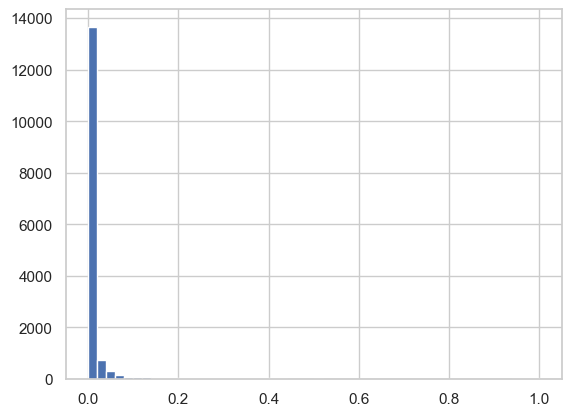

In [15]:
race_data['AM_proportion'].hist(bins=50)


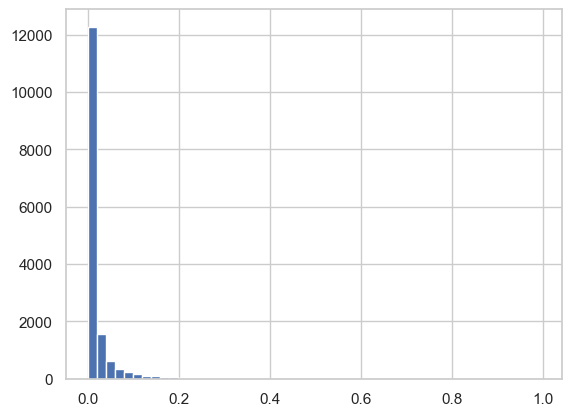

In [16]:
race_data['AS_proportion'].hist(bins=50)


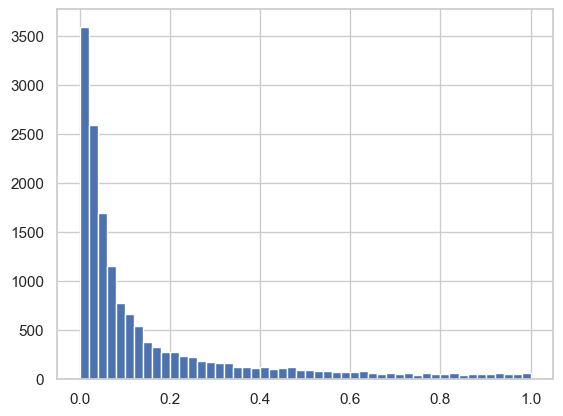

In [17]:
race_data['HI_proportion'].hist(bins=50)


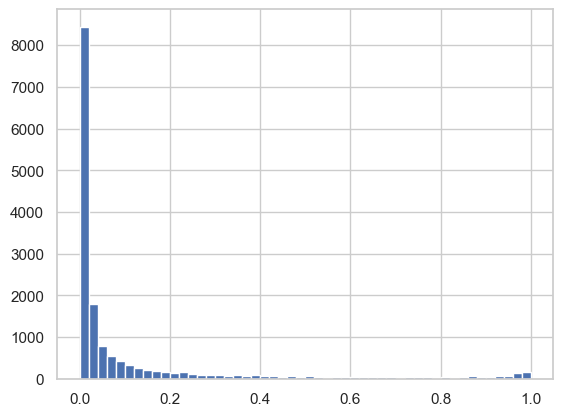

In [18]:
race_data['BL_proportion'].hist(bins=50)


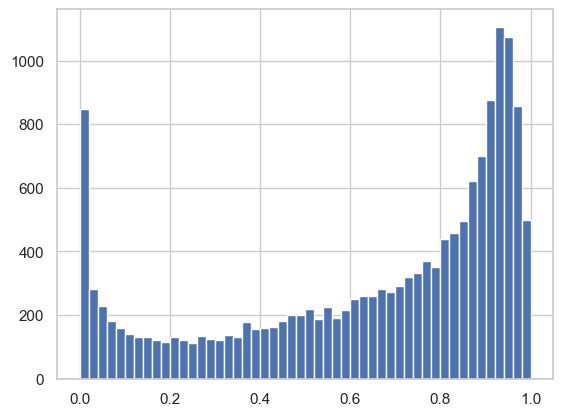

In [19]:
race_data['WH_proportion'].hist(bins=50)


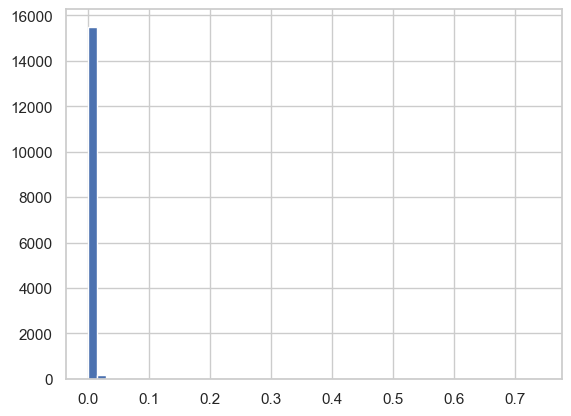

In [31]:
race_data['HP_proportion'].hist(bins=50)


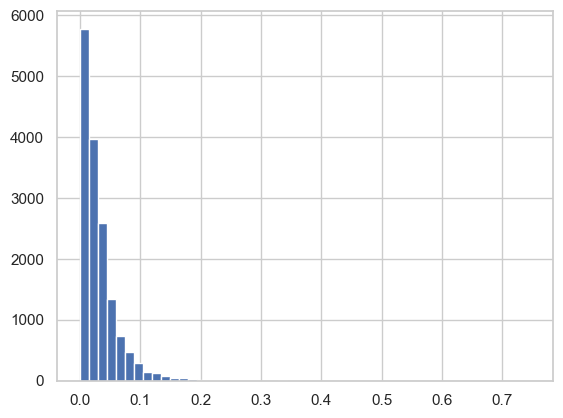

In [22]:
race_data['TR_proportion'].hist(bins=50)


# Problem 3

In [28]:
dis = pd.read_csv("/Users/stian/Desktop/DS5500/hw4/ccd_lea_002089_1516_w_1a_011717.csv")
dis = dis[['LEAID', 'SPECED']]
dis = dis.merge(race_data)
dis = dis[dis['SPECED']>=0]
dis['dis_proportion'] = dis['SPECED'] / dis['TOTAL']
dis

,LEAID,SPECED,TOTAL,AM,AS,HI,BL,WH,HP,TR,AM_proportion,AS_proportion,HI_proportion,BL_proportion,WH_proportion,HP_proportion,TR_proportion,dis_proportion
0,100005,267,5214,14,17,2289,152,2619,4,119,0.002685,0.003260,0.439010,0.029152,0.502301,0.000767,0.022823,0.051208
1,100006,430,5635,26,17,1160,50,4331,2,49,0.004614,0.003017,0.205856,0.008873,0.768589,0.000355,0.008696,0.076309
2,100007,861,13910,10,931,1008,3541,8131,14,275,0.000719,0.066930,0.072466,0.254565,0.584543,0.001006,0.019770,0.061898
3,100008,735,10011,62,862,439,2042,6186,27,393,0.006193,0.086105,0.043852,0.203976,0.617920,0.002697,0.039257,0.073419
4,100011,171,1905,2,13,241,433,1148,5,63,0.001050,0.006824,0.126509,0.227297,0.602625,0.002625,0.033071,0.089764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15729,5606240,170,1358,6,3,348,0,972,0,29,0.004418,0.002209,0.256259,0.000000,0.715758,0.000000,0.021355,0.125184
15730,5680254,15,206,206,0,0,0,0,0,0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072816
15746,7200030,123376,379818,317,54,378849,73,499,26,0,0.000835,0.000142,0.997449,0.000192,0.001314,0.000068,0.000000,0.324829
15747,7800002,637,6559,4,23,1828,4591,78,6,29,0.000610,0.003507,0.278701,0.699954,0.011892,0.000915,0.004421,0.097118


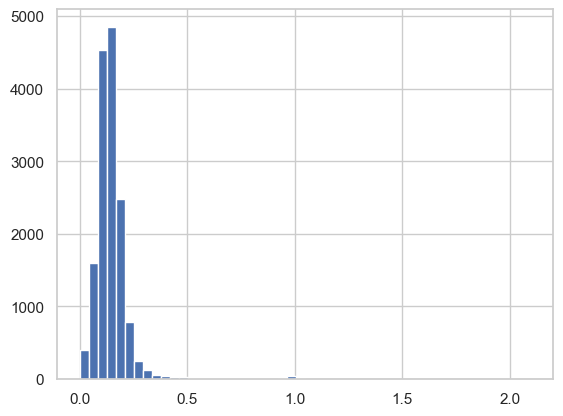

In [30]:
dis['dis_proportion'].hist(bins=50)